
#Regression & Its Evaluation | Assignment



**Question 1: What is Simple Linear Regression?**

Simple Linear Regression is a statistical method that helps us understand the relationship between two continuous variables.

 One variable is the predictor (or independent variable), and the other is the outcome (or dependent variable). It models this relationship using a straight line, helping us predict the outcome based on the predictor.

For example, predicting exam scores based on study hours.

**Question 2: What are the key assumptions of Simple Linear Regression?**

Here are the key assumptions of Simple Linear Regression:

1. **Linearity:** The relationship between the predictor and outcome should be linear.
2. **Independence:** Observations should be independent of each other.
3. **Homoscedasticity:** Residuals should have constant variance.
4. **Normality:** Residuals should be normally distributed.
5. **No or little multicollinearity:** Not a major concern in simple linear regression (only one predictor).

Violating these assumptions can lead to inaccurate models.


**Question 3: What is heteroscedasticity, and why is it important to address in regression models?**

DefinitionHeteroscedasticity occurs when the variance of residuals isn't constant, violating the homoscedasticity assumption of linear regression.

**Why is it important to address?**

1. **Inefficient estimates:** Heteroscedasticity leads to inaccurate standard errors, affecting coefficient estimates.
2. **Unreliable inference:** Hypothesis tests (e.g., t-tests) and confidence intervals become unreliable, impacting model interpretation.

- Consequences

1. Inaccurate p-values and confidence intervals
2. Misleading conclusions about predictor significance

**Addressing Heteroscedasticity**

1. Data transformation (e.g., log, square root)
2. Robust standard errors (e.g., White's method)
3. Weighted least squares regression

**Summary**

Heteroscedasticity can distort regression results. Addressing it ensures reliable estimates and valid inference, improving model quality.


**Question 4: What is Multiple Linear Regression?**

Multiple Linear Regression (MLR) is a way to predict a continuous outcome (like house price) using multiple factors (like area, location, bedrooms, etc.). It's like Simple Linear Regression, but with more than one predictor.

Think of it like predicting exam scores using study hours, sleep hours, and stress levels.

The equation looks like this:
Outcome = Constant + (Factor1 × Weight1) + (Factor2 × Weight2) + ... + Error

It helps understand which factors matter most and predict outcomes.


**Question 5: What is polynomial regression, and how does it differ from linear
regression?**

**Polynomial Regression:**
Polynomial regression is a type of regression analysis where the relationship between the predictor variable(s) and the outcome variable is modeled as a polynomial equation (e.g., quadratic, cubic).

**Key Differences from Linear Regression**

1. **Relationship Type:** Linear regression models a straight-line relationship, while polynomial regression captures curved relationships.
2. **Equation Form: Linear:** y = a + bx; Polynomial: y = a + bx + cx² + dx³ + ...
3. **Flexibility:** Polynomial regression can fit more complex patterns.

When to Use Polynomial Regression- Non-linear patterns: Data shows curvature (e.g., U-shape, S-curve).
- Improving fit: Linear model underfits data.


**Question 6: Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points.
(Include your Python code and output in the code box below.)**

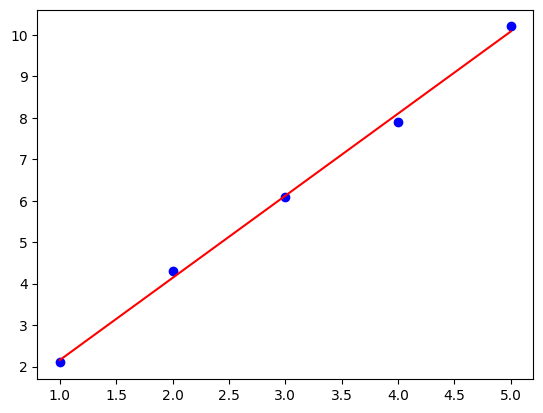

Intercept: 0.18
Slope: 1.98


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='red')
plt.show()

print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.2f}")

**Question 7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.
(Include your Python code and output in the code box below.)**

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

X = data[['Area', 'Rooms']]
y = data['Price']

model = LinearRegression()
model.fit(X, y)

# VIF
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF:", vif)

print(f"Area coef: {model.coef_[0]:.2f}")
print(f"Rooms coef: {model.coef_[1]:.2f}")

VIF: [np.float64(127.7969230769227), np.float64(127.7969230769227)]
Area coef: 63.16
Rooms coef: 34736.84


**Question 8: Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.**

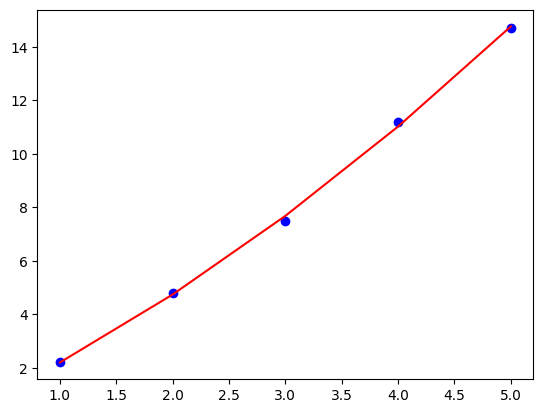

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

X_poly = PolynomialFeatures(degree=2).fit_transform(X)
model = LinearRegression().fit(X_poly, Y)
Y_pred = model.predict(X_poly)

plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='red')
plt.show()

**Question 9: Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.**

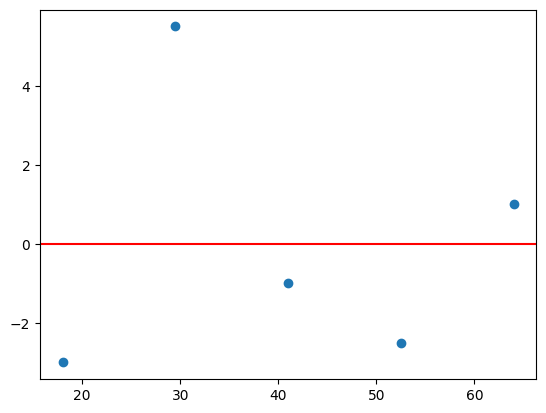

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression().fit(X, Y)
Y_pred = model.predict(X)
residuals = Y - Y_pred

plt.scatter(Y_pred, residuals)
plt.axhline(0, color='red')
plt.show()


**Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.**

As a data scientist working for a real estate company, I'd love to walk you through how I'd tackle heteroscedasticity and multicollinearity when predicting house prices using features like area, number of rooms, and location

**What's the issue?**

- **Heteroscedasticity:** The spread of errors (residuals) isn't constant across different house prices. Think of it like predicting prices for ₹10L vs ₹1Cr houses – the errors might be way bigger for pricier homes.

- **Multicollinearity:** Features like area and number of rooms might be too closely related, making it hard to tell which one is actually driving the price.

**Fixing Heteroscedasticity:**

1. Transform the data: I'd try transforming house prices (log or square root) to even out the spread 📈.
2. Use robust methods: Apply techniques like White's method to make the model more chill about uneven errors.
3. Weighted modelling: Give more importance to data points with smaller errors, so they influence the model more.


**Fixing Multicollinearity:**

1. Check correlations: Use VIF (Variance Inflation Factor) to spot which features are BFFs (like area and rooms).
2. Simplify features: Maybe combine or drop some features. For example, use "area per room" instead of separate area and rooms.
3. Use smart models: Lasso or Ridge regression can help tone down the effect of correlated features.

**Other tricks up my sleeve:**

- Prep the data: Clean up missing values and outliers.
- Try other models: Decision trees or random forests might handle these issues more smoothly.
- Test thoroughly: Use cross-validation to check if the model works well in real life.

